<a href="https://colab.research.google.com/github/bob8dod/NLP_SelfStudying/blob/main/Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding

## Keras

In [ ]:
v = Embedding(20000, 128, input_length=500)
# vocab_size = 20000 -> 해당 데이터는 총 몇개의 단어로 구성되어 있느냐
# output_dim = 128 -> 몇개의 차원으로 나타낼 것이냐
# input_length = 500 -> 몇개의 corpus를 넣을 것이냐

## Word2Vec

In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 448 kB 58.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
data = open('/content/1.txt', 'r', encoding='utf-8')
reviews = data.read().split('\n')
review_data = [r.split(',')[1] for r in reviews]
review_data = pd.DataFrame(review_data, columns=['review'])
review_data.head()

,review
0,가격대비 괜찮네요 착한가격 빠른배송 만족 합니다
1,원래 쓰던거라 상큼하니 가볍고 좋앙
2,가성비갑강추합니다
3,저렴하게 굿구매 감사
4,너무좋아요 가격도싸게사고 두개나득템ㅠ 냄새진짜취저에여ㅠㅠ


In [ ]:
print(len(review_data))

331


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
review_data['review'] = review_data['review'] .str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
review_data.head()

,review
0,가격대비 괜찮네요 착한가격 빠른배송 만족 합니다
1,원래 쓰던거라 상큼하니 가볍고 좋앙
2,가성비갑강추합니다
3,저렴하게 굿구매 감사
4,너무좋아요 가격도싸게사고 두개나득템ㅠ 냄새진짜취저에여ㅠㅠ


In [ ]:
# 형태소 분석 - 토큰화
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
tokenized_data = []
for sentence in review_data['review']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 16
리뷰의 평균 길이 : 6.096676737160121


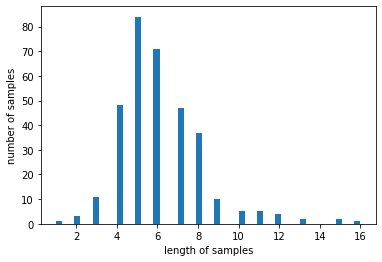

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 20, window = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
print(model.wv.vectors.shape)
model.wv.vectors #이제 이상태로 히든레이어에 넣으면 원하는대로 사용가능

(84, 20)


array([[-0.00134334, -0.00322111, -0.00515075, ...,  0.01563498,
         0.02335054, -0.00503694],
       [-0.00354766,  0.01125529, -0.00382704, ..., -0.01192689,
        -0.00586586,  0.01851583],
       [-0.01836547, -0.01456385, -0.01396365, ...,  0.00297436,
         0.0163564 , -0.0189751 ],
       ...,
       [ 0.00741827, -0.00386968,  0.01179863, ...,  0.02110151,
         0.01546897, -0.01908136],
       [-0.01528086, -0.0131008 , -0.01013615, ...,  0.02494558,
        -0.01409938,  0.00475392],
       [ 0.00891863,  0.0048786 , -0.0253587 , ..., -0.01820784,
         0.01358234,  0.01801804]], dtype=float32)

In [ ]:
print(model.wv.most_similar("빠르다"))

[('제', 0.6140363216400146), ('잘살다', 0.4553600549697876), ('정말', 0.35710009932518005), ('냄새', 0.3307492733001709), ('ㅎㅎ', 0.31280961632728577), ('쓰기', 0.30893436074256897), ('요', 0.2729012370109558), ('인데', 0.2654724419116974), ('만족', 0.2649107873439789), ('용', 0.2516595125198364)]


## Glove

In [ ]:
! pip install glove_python_binary

     |████████████████████████████████| 948 kB 30.4 MB/s 


In [ ]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
# 현재는 훈련데이터가 없음....

glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.

In [ ]:
model_result1=glove.most_similar("man")
print(model_result1)

[('woman', 0.9621753707315267), ('guy', 0.8860281455579162), ('girl', 0.8609057388487154), ('kid', 0.8383640509911114)]

### FastText

https://joyhong.tistory.com/137